# **Introduction to Portfolio Analysis in Python**

## **Chapter 4 - Portfolio Optimization**

The optimization problem: finding optimal weights

\begin{align}
\text{minimise } & w^T {\sum_{}w}
\end{align}
\begin{align}
\text{subject to } & w^T\mu >= \mu^*
\end{align}
\begin{align}
w^T1=1
\end{align}
\begin{align}
w_i>=0
\end{align}

In words:
- Minimize the portfolio variance, subject to:
- The expected mean return is at least some target return
- The weights sum up to 100%
- At least some weights are positive

In [4]:
!python3 -m pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.4 MB/s eta 0:00:00


https://pyportfolioopt.readthedocs.io/en/latest/

**Calculating expected risk and returns**

For this exercise, you're going to start with the raw price data. Wha
t you'll need for portfolio optimization, is the expected risk and return from this data.

With PyPortfolioOpt, you can calculate the expected risk and return in just one line of code, so that makes it very easy for you. The library you need is called pypfopt in short. FYI, you'll see in the next exercise that PyPortfolioOpt gives you the same output if you were to calculate it by hand. Let's give it a try!

In [5]:
import pandas as pd

stock_prices = pd.read_csv("small_portfolio.csv")
stock_prices.head()

,date,GE,JPM,MSFT,PG
0,2015-01-02,25.06,62.49,46.760,90.44
1,2015-01-05,24.60,60.55,46.325,90.01
2,2015-01-06,24.07,58.98,45.650,89.60
3,2015-01-07,24.08,59.07,46.230,90.07
4,2015-01-08,24.37,60.39,47.590,91.10


In [6]:
stock_prices = stock_prices.set_index('date')
stock_prices.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


In [9]:
# Import the packages
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

# Calculate expected returns mu
mu = expected_returns.mean_historical_return(stock_prices)

# Calculate the covariance matrix S
Sigma = risk_models.sample_cov(stock_prices)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)
print (mu, Sigma)

GE     -0.175812
JPM     0.185643
MSFT    0.223083
PG     -0.045684
dtype: float64             GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810


**PyPortfolioOpt risk functions**

The objective of the Markowitz portfolio optimization problem is to minimize the portfolio variance, given a bunch of constraints. Do you remember how you calculate this from chapter 2? Portfolio variance = weights transposed * covariance matrix * weights. WithPyPortfolioOpt we call the covariance matrix sigma, to denote that this is a sample covariance
.

In this exercise you will see that thePyPortfolioOpt functions to calculate sigma, gives the exact same result if you were to calculate the covariance by hand. The same goes for the expected return calculations, you can also verifyPyPortfolioOpt gives the same output as calculating annualized daily returns by hand. Available are the stock_prices. Let's explore this a bit further…

In [10]:
# Get the returns from the stock price data
returns=stock_prices.pct_change()

# Calculate the annualized covariance matrix
covMatrix = returns.cov()*252

# Calculate the covariance matrix Sigma from a`PyPortfolioOpt` function
Sigma = risk_models.sample_cov(stock_prices)

# Print both covariance matrices
print (covMatrix, Sigma)

            GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810             GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810


**Optimal portfolio performance**

Let's now continue with the efficient frontier ef that you calculated in a previous exercise for the small portfolio. You still need to select an optimal portfolio from that efficient frontier ef, and check its performance. Let's use the efficient_return option. This function selects the portfolio with the minimized risk given a target return. A portfolio manager is often asked to manage a portfolio under certain risk and return constraints, so this is a very useful function for that.

mu and Sigma are already calculated for you and ef is also available.

In [11]:
# Get the minimum risk portfolio for a target return
weights = ef.efficient_return(0.2)
print (weights)

# Show portfolio performance
ef.portfolio_performance(verbose=True)

OrderedDict([('GE', 0.0), ('JPM', 0.4926529085352376), ('MSFT', 0.4900890447252643), ('PG', 0.017258046739498)])
Expected annual return: 20.0%
Annual volatility: 19.2%
Sharpe Ratio: 0.94


(0.19999999999999998, 0.19152666984849026, 0.9398168941296343)

**Portfolio optimization: Max Sharpe**

In this exercise, you're going to calculate the portfolio that gives the Maximum Sharpe ratio. Often, this is the portfolio the investor wants to invest in, as it provides the highest possible return to risk ratio.PyPortfolioOpt makes it very easy to calculate this portfolio from a set of historical price data.

Available for you are the mean historic return for a small portfolio of stocks under mu and a covariance matrix belonging to our portfolio under Sigma. You'll need these as inputs to calculate the Efficient Frontier and Maximum Sharpe portfolio. Let's try it!

In [12]:
# Define the efficient frontier
ef = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()
print (raw_weights_maxsharpe, cleaned_weights_maxsharpe)

OrderedDict([('GE', 0.0), ('JPM', 0.4251955192429594), ('MSFT', 0.5748044807570406), ('PG', 0.0)]) OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.5748), ('PG', 0.0)])


**Question:** Why are some of the weights in the Maximum Sharpe portfolio zero?

**Answer:** Some of the expected returns of the stocks are negative. That does not necessarily exclude them from the Maximum Sharpe portfolio, but in this case, those negative stocks just lower returns without lowering the risk of the portfolio. That's why they are not of the optimal risk-return portfolio.

**Minimum volatility optimization**

In this exercise, you're going to compare the minimum volatility and the Maximum Sharpe portfolios. As a portfolio manager you often want to understand how your chosen portfolio measures up to the minimum volatility portfolio. WithPyPortfolioOpt you can compare the two quickly, without having to write two different constrained optimization problems, which can be quite complex. Available for you is the efficient frontier from the previous exercise under ef. Let's give it a try!

In [18]:
# Calculate expected returns mu
mu = expected_returns.mean_historical_return(stock_prices)

# Calculate the covariance matrix S
Sigma = risk_models.sample_cov(stock_prices)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()

# Show portfolio performance
print(cleaned_weights_maxsharpe)
perf_max_sharpe = ef.portfolio_performance(verbose=True)
perf_max_sharpe

OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.5748), ('PG', 0.0)])
Expected annual return: 20.7%
Annual volatility: 19.6%
Sharpe Ratio: 0.96


(0.20716402573897588, 0.1959516973774276, 0.9551538886569299)

In [19]:
# Adding constraints to an already solved problem might have
# unintended consequences. A new instance should be created
# for the new set of constraints.

# Calculate expected returns mu
mu = expected_returns.mean_historical_return(stock_prices)

# Calculate the covariance matrix S
Sigma = risk_models.sample_cov(stock_prices)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)

# Calculate weights for the minimum volatility portfolio
raw_weights_minvol = ef.min_volatility()
cleaned_weights_minvol = ef.clean_weights()

# Show portfolio performance
print(cleaned_weights_minvol)
perf_min_volatility = ef.portfolio_performance(verbose=True)
perf_min_volatility

OrderedDict([('GE', 0.15732), ('JPM', 0.11714), ('MSFT', 0.04704), ('PG', 0.6785)])
Expected annual return: -2.6%
Annual volatility: 13.3%
Sharpe Ratio: -0.35


(-0.026415861751657263, 0.13292386607830184, -0.3491913312566078)

**Comparing max Sharpe to min vol**

In this exercise let's have a closer look at the weights and performance of the Maximum Sharpe and minimum volatility portfolios, and compare them. This exercise will help you understand the characteristics of these two different portfolios. Available are cleaned_weights_minvol, cleaned_weights_maxsharpe, perf_min_volatility, and perf_max_sharpe.

In [20]:
# Print min vol and max sharpe results
print(cleaned_weights_minvol,cleaned_weights_maxsharpe,perf_min_volatility,perf_max_sharpe, sep="\n")

OrderedDict([('GE', 0.15732), ('JPM', 0.11714), ('MSFT', 0.04704), ('PG', 0.6785)])
OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.5748), ('PG', 0.0)])
(-0.026415861751657263, 0.13292386607830184, -0.3491913312566078)
(0.20716402573897588, 0.1959516973774276, 0.9551538886569299)


**Question:** Which statement correctly describes the difference between the maximum Sharpe portfolio and the minimum volatility portfolio you calculated in the previous exercises?

**Answer:** The min volatility portfolio has a lower performance but lower risk, since all stocks have a positive weight in the min vol portfolio and some stocks have a negative expected return.

**Exponentially weighted returns and risk**

In this exercise, you're going to perform portfolio optimization with a slightly different way of estimating risk and returns; you're going to give more weight to recent data in the optimization.

This is a smart way to deal with stock data that is typically non-stationary, i.e., when the distribution changes over time. Implementation can be quickly done by changing the risk model you use to calculate Sigma, and the returns calculation you use to get mu. The stock prices dataset is available as stock_prices. Let's try!

In [36]:
# Define exponentially weightedSigma and mu using stock_prices
Sigma = risk_models.exp_cov(stock_prices, span=180, frequency=252)
mu = expected_returns.ema_historical_return(stock_prices, frequency=252, span=180)

# Calculate the efficient frontier
ef = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum sharpe ratio optimization
raw_weights_maxsharpe = ef.max_sharpe()

# Show portfolio performance
ef.portfolio_performance(verbose=True)

Expected annual return: 27.1%
Annual volatility: 24.4%
Sharpe Ratio: 1.03


(0.27060086764443547, 0.24440611989379227, 1.0253461237113668)

**Comparing approaches**

In this exercise, you're going to investigate whether the maximum Sharpe portfolios differ when you are using the normal historic expected risk and returns, and when using the exponentially weighted risk and returns. You saw during the video that the exponentially weighted volatility follows the real volatility much closer, but do you actually see a big difference in the portfolio weights when using one, or the other? That's what you'll find out.

The exponentially weighted risk and return have been calculated using a span of 252 trading days, so it looks back through a maximum period of a year. Available for you are: cleaned_weights_maxsharpe, perf_max_sharpe, cleaned_weights_maxsharpe_EW, perf_max_sharpe_EW. The _EW part stands for exponentially weighted.

In [40]:
# Define exponentially weightedSigma and mu using stock_prices
Sigma = risk_models.exp_cov(stock_prices, span=252, frequency=252)
mu = expected_returns.ema_historical_return(stock_prices, frequency=252, span=252)

# Calculate the efficient frontier
ef_2 = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum sharpe ratio optimization
raw_weights_maxsharpe = ef_2.max_sharpe()
cleaned_weights_maxsharpe_EW = ef_2.clean_weights()

# Show portfolio performance
perf_max_sharpe_EW = ef_2.portfolio_performance(verbose=True)
perf_max_sharpe_EW

Expected annual return: 29.0%
Annual volatility: 20.6%
Sharpe Ratio: 1.31


(0.2895438012913622, 0.20602625377451866, 1.3082983180694974)

In [41]:
# Print the weights of both portfolios types
print(cleaned_weights_maxsharpe, cleaned_weights_maxsharpe_EW, sep="\n")

OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.5748), ('PG', 0.0)])
OrderedDict([('GE', 0.0), ('JPM', 0.34629), ('MSFT', 0.65371), ('PG', 0.0)])


In [48]:
# Calculate expected returns mu
mu = expected_returns.mean_historical_return(stock_prices)
# Calculate the covariance matrix S
Sigma = risk_models.sample_cov(stock_prices)
# Obtain the efficient frontier
ef_1 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe = ef_1.max_sharpe()

In [49]:
# Print the performance of both portfolios types
perf_max_sharpe = ef_1.portfolio_performance(verbose=True)
perf_max_sharpe_EW = ef_2.portfolio_performance(verbose=True)

Expected annual return: 20.7%
Annual volatility: 19.6%
Sharpe Ratio: 0.96
Expected annual return: 29.0%
Annual volatility: 20.6%
Sharpe Ratio: 1.31


**Question:** What could be a reason why the two portfolios are actually not that different to each other?

**Answer:**
- The span of 252 is pretty long relative the full dataset, which means both are calculated  with largerly the same data input.
- The trends in the data are relatively persistent: that's why weights for example GE and PG are zero for both portfolios, and both portfolios only invest in JPM and MSFT.

**Changing the span**

At the last exercise you discovered that the span of the exponentially weighted risk and return can have an impact on what the optimal portfolio looks like. In fact, the span has a very big influence! By setting the span, you can either use data for say only the most recent days, or use data from the most recent years. In the limit, when the span is as long as the full sample, it will be equal to using the normal historic mean.

Now let's get a feel for how a short and long span changes your optimal portfolio. Available is the stock_prices data.

In [50]:
# Calculate expected returns and sample covariance
mu_ema = expected_returns.ema_historical_return(stock_prices, span=504 ,frequency=252)
Sigma_ew = risk_models.exp_cov(stock_prices, span=504, frequency=252)
ef_2 = EfficientFrontier(mu_ema, Sigma_ew)

# Calculate weights for the maximum Sharpe ratio portfolio
weights = ef_2.max_sharpe()
cleaned_weights_maxsharpe_EW = ef_2.clean_weights()
perf_max_sharpe_EW = ef_2.portfolio_performance(verbose=True)

Expected annual return: 30.3%
Annual volatility: 18.5%
Sharpe Ratio: 1.53


In [51]:
# Calculate expected returns and sample covariance
mu_ema = expected_returns.ema_historical_return(stock_prices, span=10 ,frequency=252)
Sigma_ew = risk_models.exp_cov(stock_prices, span=10, frequency=252)
ef_2 = EfficientFrontier(mu_ema, Sigma_ew)

# Calculate weights for the maximum Sharpe ratio portfolio
weights = ef_2.max_sharpe()
cleaned_weights_maxsharpe_EW = ef_2.clean_weights()
perf_max_sharpe_EW = ef_2.portfolio_performance(verbose=True)

Expected annual return: 12.8%
Annual volatility: 17.0%
Sharpe Ratio: 0.63


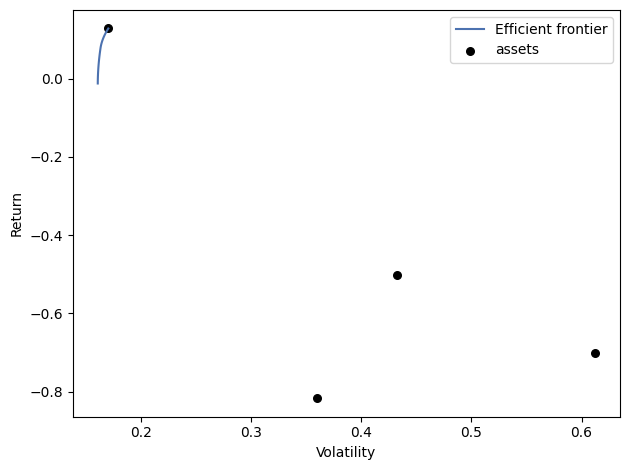

In [55]:
import matplotlib.pyplot as plt
from pypfopt import plotting

fig, ax = plt.subplots()
mu_ema = expected_returns.ema_historical_return(stock_prices, span=10 ,frequency=252)
Sigma_ew = risk_models.exp_cov(stock_prices, span=10, frequency=252)
ef_2 = EfficientFrontier(mu_ema, Sigma_ew)
plotting.plot_efficient_frontier(ef_2, ax=ax, show_assets=True)
plt.show()

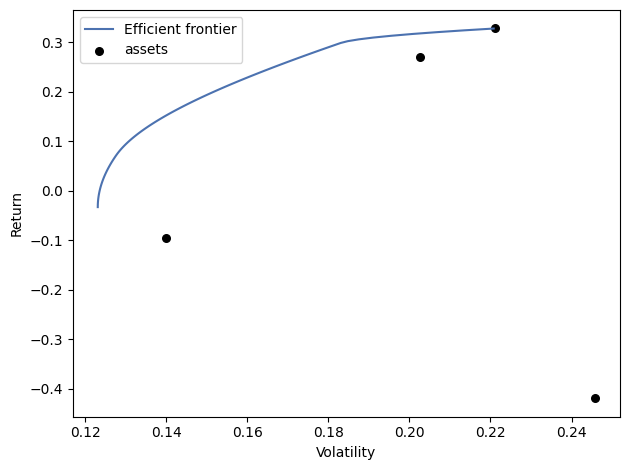

In [56]:
mu_ema = expected_returns.ema_historical_return(stock_prices, span=504 ,frequency=252)
Sigma_ew = risk_models.exp_cov(stock_prices, span=504, frequency=252)
ef_2 = EfficientFrontier(mu_ema, Sigma_ew)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef_2, ax=ax, show_assets=True)
plt.show()

**Using downside risk in the optimizatio**

PyPortfolioOpt allows you to use semicovariance in the optimization (measure for downside risk)

https://pyportfolioopt.readthedocs.io/en/latest/RiskModels.html

In [61]:
mu_ema = expected_returns.ema_historical_return(stock_prices, span=252,frequency=252)
Sigma_ew = risk_models.semicovariance(stock_prices, span=252, frequency=252)
ef = EfficientFrontier(mu_ema, Sigma_ew)

weights = ef.max_sharpe()
cleaned_weights_maxsharpe_EW = ef.clean_weights()
perf_max_sharpe_EW = ef.portfolio_performance(verbose=True)

Expected annual return: 30.6%
Annual volatility: 14.5%
Sharpe Ratio: 1.98


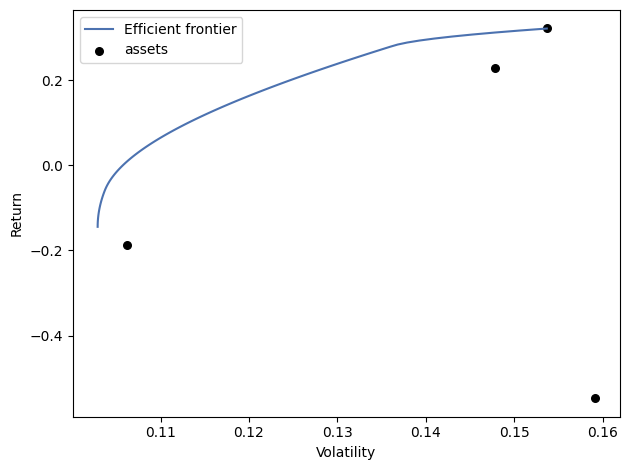

In [63]:
mu_ema = expected_returns.ema_historical_return(stock_prices, span=252,frequency=252)
Sigma_ew = risk_models.semicovariance(stock_prices, span=252, frequency=252)
ef = EfficientFrontier(mu_ema, Sigma_ew)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()